In [ ]:
!pip install kaggle


In [ ]:
# Configure Kaggle API
from google.colab import files
files.upload()  # Upload 'kaggle.json'

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download datasets
!kaggle datasets download -d saurabhbadole/latest-data-science-job-salaries-2024
!kaggle datasets download -d asaniczka/1-3m-linkedin-jobs-and-skills-2024


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/saurabhbadole/latest-data-science-job-salaries-2024
License(s): CC0-1.0
  0% 0.00/69.3k [00:00<?, ?B/s]
100% 69.3k/69.3k [00:00<00:00, 76.4MB/s]
Dataset URL: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
License(s): ODC Attribution License (ODC-By)
100% 1.87G/1.88G [00:19<00:00, 38.6MB/s]
100% 1.88G/1.88G [00:19<00:00, 102MB/s] 


In [ ]:
!unzip latest-data-science-job-salaries-2024.zip
!unzip 1-3m-linkedin-jobs-and-skills-2024.zip


Archive:  latest-data-science-job-salaries-2024.zip
  inflating: DataScience_salaries_2024.csv  
Archive:  1-3m-linkedin-jobs-and-skills-2024.zip
  inflating: job_skills.csv          
  inflating: job_summary.csv         
  inflating: linkedin_job_postings.csv  


In [ ]:
import pandas as pd


ds_jobs = pd.read_csv("DataScience_salaries_2024.csv")
linkedin_jobs = pd.read_csv("linkedin_job_postings.csv")

# View the datasets
print(ds_jobs.head())



   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

In [ ]:
print(linkedin_jobs.head())

                                            job_link  \
0  https://www.linkedin.com/jobs/view/account-exe...   
1  https://www.linkedin.com/jobs/view/registered-...   
2  https://www.linkedin.com/jobs/view/restaurant-...   
3  https://www.linkedin.com/jobs/view/independent...   
4  https://www.linkedin.com/jobs/view/group-unit-...   

             last_processed_time got_summary got_ner is_being_worked  \
0   2024-01-21 07:12:29.00256+00           t       t               f   
1   2024-01-21 07:39:58.88137+00           t       t               f   
2  2024-01-21 07:40:00.251126+00           t       t               f   
3  2024-01-21 07:40:00.308133+00           t       t               f   
4  2024-01-19 09:45:09.215838+00           f       f               f   

                                           job_title  \
0  Account Executive - Dispensing (NorCal/Norther...   
1                 Registered Nurse - RN Care Manager   
2               RESTAURANT SUPERVISOR - THE FORKLIFT   
3     

In [ ]:
# ---------------- Cleaning DataScience Jobs Dataset ----------------
# Fill missing values for `salary_in_usd` with the median salary
ds_jobs.fillna({'salary_in_usd': ds_jobs['salary_in_usd'].median()}, inplace=True)

# Drop irrelevant columns
ds_jobs.drop(columns=['employee_residence', 'salary_currency', 'remote_ratio'], inplace=True)

# Normalize `job_title` for consistent merging
ds_jobs['job_title'] = ds_jobs['job_title'].str.lower().str.strip()  # Convert to lowercase and remove extra spaces




In [ ]:
# ---------------- Cleaning LinkedIn Jobs Dataset ----------------
# Fill missing values
linkedin_jobs['company'].fillna('Unknown', inplace=True)  # Replace NaNs in company with 'Unknown'
linkedin_jobs['job_level'].fillna('Unknown', inplace=True)  # Replace NaNs in job level with 'Unknown'
linkedin_jobs['job_type'].fillna('Unknown', inplace=True)  # Replace NaNs in job type with 'Unknown'

# Drop irrelevant columns
linkedin_jobs.drop(columns=[
    'job_link', 'last_processed_time', 'got_summary', 'got_ner',
    'is_being_worked', 'first_seen', 'search_city', 'search_country',
    'search_position'
], inplace=True)

# Normalize `job_title` for consistent merging
linkedin_jobs['job_title'] = linkedin_jobs['job_title'].str.lower().str.strip()  # Convert to lowercase and remove extra spaces


# Rename columns for consistency
linkedin_jobs.rename(columns={
    'company': 'company_name',  # Align with `ds_jobs`
}, inplace=True)



<ipython-input-43-109e869379c0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  linkedin_jobs['company'].fillna('Unknown', inplace=True)  # Replace NaNs in company with 'Unknown'
<ipython-input-43-109e869379c0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [ ]:
# ---------------- Save Cleaned Datasets ----------------
ds_jobs.to_csv('cleaned_ds_jobs.csv', index=False)
linkedin_jobs.to_csv('cleaned_linkedin_jobs.csv', index=False)
linkedin_jobs


,job_title,company_name,job_location,job_level,job_type
0,account executive - dispensing (norcal/norther...,BD,"San Diego, CA",Mid senior,Onsite
1,registered nurse - rn care manager,Trinity Health MI,"Norton Shores, MI",Mid senior,Onsite
2,restaurant supervisor - the forklift,Wasatch Adaptive Sports,"Sandy, UT",Mid senior,Onsite
3,independent real estate agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",Mid senior,Onsite
4,group/unit supervisor (systems support manager...,"IRS, Office of Chief Counsel","Chamblee, GA",Mid senior,Onsite
...,...,...,...,...,...
1348449,registered nurse (rn) #cp-rn-7998660 - 2411627...,TravelNurseSource,"Providence, RI",Mid senior,Onsite
1348450,construction superintendent,Jobot,"New Iberia, LA",Mid senior,Onsite
1348451,"executive chef, operations support",NEXDINE Hospitality,"Riverhead, NY",Mid senior,Onsite
1348452,"rn- registered nurse, analyst - - 23934913expp...",TravelNurseSource,"Aurora, CO",Mid senior,Onsite


In [ ]:
# ---------------- Merging Datasets ----------------
# Merge on `job_title` as a common key using left join to keep all rows from ds_jobs
merged_data = pd.merge(
    ds_jobs,
    linkedin_jobs,
    on='job_title',
    how='left'  # Use left join to retain all rows from ds_jobs
)

# Save the merged dataset
merged_data.to_csv('merged_jobs_data.csv', index=False)

# Print the number of rows and columns after merge to confirm
print(f"After merging, the dataset has {merged_data.shape[0]} rows and {merged_data.shape[1]} columns.")




After merging, the dataset has 1440780 rows and 12 columns.


In [ ]:
# Get the column names of the merged dataset
column_names = merged_data.columns

# Print the column names
print("Column names of the merged dataset:")
print(column_names)


Column names of the merged dataset:
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_in_usd', 'company_location', 'company_size',
       'company_name', 'job_location', 'job_level', 'job_type'],
      dtype='object')


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440780 entries, 0 to 1440779
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   work_year         1440780 non-null  int64 
 1   experience_level  1440780 non-null  object
 2   employment_type   1440780 non-null  object
 3   job_title         1440780 non-null  object
 4   salary            1440780 non-null  int64 
 5   salary_in_usd     1440780 non-null  int64 
 6   company_location  1440780 non-null  object
 7   company_size      1440780 non-null  object
 8   company_name      1439623 non-null  object
 9   job_location      1439623 non-null  object
 10  job_level         1439623 non-null  object
 11  job_type          1439623 non-null  object
dtypes: int64(3), object(9)
memory usage: 131.9+ MB


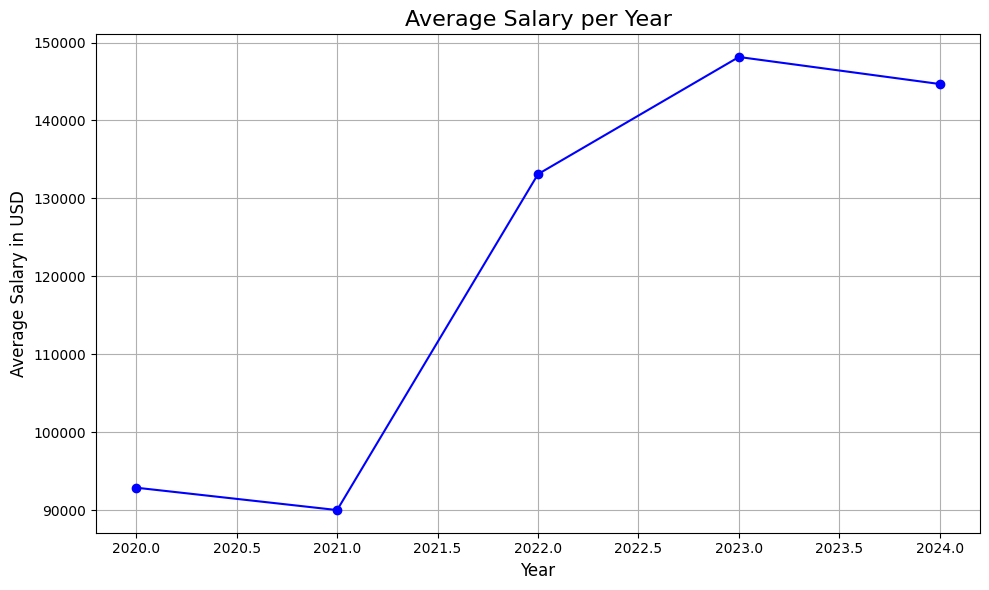

In [ ]:
import matplotlib.pyplot as plt

# Group the data by work_year and calculate the mean salary_in_usd
salary_trends = merged_data.groupby('work_year')['salary_in_usd'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
salary_trends.plot(kind='line', marker='o', color='b')

# Set plot labels and title
plt.title('Average Salary per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Download the new dataset using the Kaggle API
!kaggle datasets download -d arshkon/linkedin-job-postings

# Unzip the dataset
!unzip linkedin-job-postings.zip


Dataset URL: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings
License(s): CC-BY-SA-4.0
 98% 156M/159M [00:01<00:00, 83.8MB/s]
100% 159M/159M [00:01<00:00, 89.9MB/s]
Archive:  linkedin-job-postings.zip
  inflating: companies/companies.csv  
  inflating: companies/company_industries.csv  
  inflating: companies/company_specialities.csv  
  inflating: companies/employee_counts.csv  
  inflating: jobs/benefits.csv       
  inflating: jobs/job_industries.csv  
  inflating: jobs/job_skills.csv     
  inflating: jobs/salaries.csv       
  inflating: mappings/industries.csv  
  inflating: mappings/skills.csv     
  inflating: postings.csv            


In [ ]:

# Load the dataset
postings = pd.read_csv('postings.csv')
# Handle missing values
postings['company_name'].fillna('Unknown', inplace=True)
postings['location'].fillna('Unknown', inplace=True)
postings['skills_desc'].fillna('No description provided', inplace=True)
postings['max_salary'].fillna(postings['max_salary'].median(), inplace=True)  # Or mean
postings['med_salary'].fillna(postings['med_salary'].median(), inplace=True)

# Convert 'listed_time' from milliseconds to seconds and then to datetime
postings['listed_time'] = pd.to_datetime(postings['listed_time'] / 1000, unit='s')


# Standardize categorical data
postings['work_type'] = postings['work_type'].str.upper()
postings['currency'] = postings['currency'].str.upper()

# Drop irrelevant columns
postings.drop(columns=['job_posting_url', 'application_url'], inplace=True)

# Ensure proper data types
postings['max_salary'] = pd.to_numeric(postings['max_salary'], errors='coerce')
postings['views'] = pd.to_numeric(postings['views'], errors='coerce')

# Verify the cleaned dataset
print(postings.head())


<ipython-input-56-e665e5b89433>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  postings['company_name'].fillna('Unknown', inplace=True)
<ipython-input-56-e665e5b89433>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

     job_id            company_name  \
0    921716   Corcoran Sawyer Smith   
1   1829192                 Unknown   
2  10998357  The National Exemplar    
3  23221523  Abrams Fensterman, LLP   
4  35982263                 Unknown   

                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney - Elder Law / Trusts...    175000.0     YEARLY   
4  Looking for HVAC service tech 

In [ ]:
# Load the previously merged dataset
merged_data = pd.read_csv('merged_jobs_data.csv')

# Verify the structure of the merged dataset
print(merged_data.head())


   work_year experience_level employment_type       job_title    salary  \
0       2021               MI              FT  data scientist  30400000   
1       2021               MI              FT  data scientist  30400000   
2       2021               MI              FT  data scientist  30400000   
3       2021               MI              FT  data scientist  30400000   
4       2021               MI              FT  data scientist  30400000   

   salary_in_usd company_location company_size        company_name  \
0          40038               CL            L  Belay Technologies   
1          40038               CL            L    Futran Solutions   
2          40038               CL            L    RAND Corporation   
3          40038               CL            L     iTech Solutions   
4          40038               CL            L       Anika Systems   

             job_location   job_level job_type  
0  Annapolis Junction, MD  Mid senior   Onsite  
1              Dallas, TX  Mid

In [ ]:
print(merged_data.columns)
print(postings.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_in_usd', 'company_location', 'company_size',
       'company_name', 'job_location', 'job_level', 'job_type'],
      dtype='object')
Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')


In [ ]:
# Rename the 'title' column in postings to 'job_title' to match merged_data
postings.rename(columns={'title': 'job_title'}, inplace=True)

# Strip leading/trailing spaces and convert to lowercase for both datasets
merged_data['job_title'] = merged_data['job_title'].str.strip().str.lower()
merged_data['company_name'] = merged_data['company_name'].str.strip().str.lower()

postings['job_title'] = postings['job_title'].str.strip().str.lower()
postings['company_name'] = postings['company_name'].str.strip().str.lower()


# Now perform the merge
final_merged_data = pd.merge(
    merged_data,
    postings,
    on=['job_title', 'company_name'],  # Using 'job_title' and 'company_name' for merging
    how='inner'  # You can adjust the type of join as needed
)

# Check the result
print(final_merged_data)


       work_year experience_level employment_type       job_title    salary  \
0           2021               MI              FT  data scientist  30400000   
1           2021               MI              FT  data scientist  30400000   
2           2021               MI              FT  data scientist  30400000   
3           2020               MI              FT  data scientist  11000000   
4           2020               MI              FT  data scientist  11000000   
...          ...              ...             ...             ...       ...   
47951       2022               EN              FT    data analyst     15000   
47952       2022               EN              FT    data analyst     15000   
47953       2022               EN              FT    data analyst     15000   
47954       2022               EN              FT    data analyst     15000   
47955       2022               EN              FT    data analyst     15000   

       salary_in_usd company_location company_size 